# **Exercícios**

## 0\. Preparação do ambiente

Neste exercício vamos utilizar a base de dados de ações da bolsa de valores dos EUA, a Dow Jones. Os dados estão disponíveis para *download* neste [link](https://archive.ics.uci.edu/ml/datasets/Dow+Jones+Index). Vamos utilizar o pacote `wget` para fazer o *download* dos dados.

 - Instalando o pacote `wget` na versão 3.2.

In [ ]:
!pip install wget==3.2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

 - Fazendo o download dos dados no arquivo compactado `dados.zip`.

In [ ]:
import wget

wget.download(url='https://archive.ics.uci.edu/ml/machine-learning-databases/00312/dow_jones_index.zip', out='./dados.zip')

 - Descompactando os `dados` na pasta dados com o pacote nativo `zipfile`.


In [ ]:
import zipfile

with zipfile.ZipFile('./dados.zip', 'r') as fp:
  fp.extractall('./dados')
#extraindo os dados do arquivo 'dados.zip' que esta compactado


Verifique a pasta dados criada, ela deve conter dois arquivos:

 - **dow_jones_index.data**: um arquivo com os dados;
 - **dow_jones_index.names**: um arquivo com a descrição completa dos dados.

É possível observar que o arquivo de dados é um arquivo separado por virgulas, o famoso `csv`. Vamos renomear o arquivo de dados para que ele tenha a extensão `csv` com o pacote nativo `os`.

- Renomeando o arquivo com o pacote nativo `os`.

In [ ]:
import os

os.rename('./dados/dow_jones_index.data', './dados/dow_jones_index.csv')

## 1\. Pandas

Para processar os dados, vamos utilizar o pacote `pandas` na versão `1.1.5`. A documentação completa por ser encontrada neste [link](https://pandas.pydata.org/docs/)

In [ ]:
!pip install pandas==1.1.5


Vamos importar o pacote com o apelido (alias) `pd`.


In [ ]:
import pandas as pd

Estamos prontos para ler o arquivo.


In [ ]:
df = pd.read_csv('./dados/dow_jones_index.csv')
#pd.read_csv para ler o arquivo

O pandas trabalha com o conceito de dataframe, uma estrutura de dados com muitos métodos e atributos que aceleram o processamento de dados. Alguns exemplos:

 - Visualizando as `n` primeiras linhas:


In [ ]:
df.head(n=11)
# .head serve para visualizar as n primeiras linhas

 - Visualizando o nome das colunas:


In [ ]:
df.columns.to_list()
# name.columns.to_list() transforma o nome das colunas em uma lista.
#sendo cada titulo/nome da coluna um elemento da lista.


 - Verificando o número de linhas e colunas.


In [ ]:
linhas, colunas = df.shape
# linhas, colunas = name.shape pega a quantidade de linhas e colunas e armazena respectivamnte nas variaveis
#chamadas "linhas" e "colunas". sempre a 1 variavel será linha.
print(f'Número de linhas: {linhas}')
print(f'Número de colunas: {colunas}')

Vamos selecionar os valores de abertura, fechamento, máximo e mínimo das ações do McDonalds, listado na Dow Jones como MCD:


 - Selecionando as linha do dataframe original `df` em que a coluna `stock` é igual a `MCD`.

In [ ]:
df_mcd = df[df['stock'] == 'MCD']
        #no dataframe eu quero o df['stock'] --> (na coluna 'stock')
        #pegar a ação 'MCD'
        

 - Selecionando apenas as colunas de data e valores de ações.


In [ ]:
df_mcd = df_mcd[['date', 'open', 'high', 'low', 'close']]
#esse metodo me permite pegar do meu data frame apenas as colunas que eu quero.

Excelente, o problema é que as colunas com os valores possuem o carater `$` e são do tipo texto (`object` no `pandas`).


In [ ]:
df_mcd.head(10)

In [ ]:
df_mcd.dtypes


Vamos limpar as colunas com o método `apply`, que permite a aplicação de uma função anônima (`lambda`) qualquer. A função `lambda` remove o caracter **$** e faz a conversão do tipo de `str` para `float`.

In [ ]:
for elemento in ['open', 'high', 'low', 'close']:
  df_mcd[elemento] = df_mcd[elemento].apply(lambda value: float(value.split(sep='$')[-1]))
#método apply, que permite a aplicação de uma função anônima (lambda) qualquer. 
#A função lambda remove o caracter $ e faz a conversão do tipo de str para float.

Verifique novamente os dados e seus tipos.


In [ ]:
df_mcd.head(n=10)


,date,open,high,low,close
216,1/7/2011,77.10,77.59,73.59,74.37
217,1/14/2011,74.25,74.49,72.46,74.06
218,1/21/2011,74.65,75.75,74.31,75.01
219,1/28/2011,74.25,75.85,73.05,73.28
220,2/4/2011,73.80,74.50,73.08,74.05
221,2/11/2011,74.13,76.32,73.30,76.14
222,2/18/2011,76.07,76.45,75.70,76.13
223,2/25/2011,75.95,76.45,74.42,74.44
224,3/4/2011,74.51,76.63,73.64,76.03
225,3/11/2011,76.38,77.25,74.97,76.73


In [ ]:
df_mcd.dtypes
#tipo de dados das colunas

date      object
open     float64
high     float64
low      float64
close    float64
dtype: object

Excelente, agora podemos explorar os dados visualmente.


**Agora é a sua vez!** Conduza o mesmo processo para extrair e tratar os dados da empresa Coca-Cola (`stock` column igual a `KO`).


 - Selecionando as linha do dataframe original `df` em que a coluna `stock` é igual a `KO`.


In [ ]:
# extração e tratamento dos dados da empresa Coca-Cola. (KO)
df_ko = df[df['stock'] == 'KO']



Vamos selecionar os valores de abertura, fechamento, máximo e mínimo das ações da empresa Coca-Cola, listado na Dow Jones como KO:


 - Selecionando apenas as colunas de data e valores de ações.

In [ ]:
#data,open,high,low,close,volume
df_ko = df_ko[['date', 'open', 'high', 'low', 'close']]
#esse metodo me permite pegar do meu dataframe apenas as colunas que eu quero.

Excelente, o problema é que as colunas com os valores possuem o carater `$` e são do tipo texto (`object` no `pandas`).


In [ ]:
# Visualize os dados do dataframe
df_ko.head(n=100)


,date,open,high,low,close
204,1/7/2011,$65.88,$65.88,$62.56,$62.92
205,1/14/2011,$62.70,$63.86,$62.56,$63.13
206,1/21/2011,$63.21,$63.92,$62.72,$62.77
207,1/28/2011,$62.87,$63.31,$62.14,$62.21
208,2/4/2011,$62.32,$63.48,$61.89,$62.56
209,2/11/2011,$62.67,$64.75,$62.32,$63.57
210,2/18/2011,$63.67,$64.72,$62.55,$64.55
211,2/25/2011,$63.36,$64.40,$63.33,$64.31
212,3/4/2011,$64.17,$65.87,$63.86,$65.21
213,3/11/2011,$65.32,$65.84,$64.47,$64.81


In [ ]:
# Verifique o tipo dos dados
df_ko.dtypes
#repare q todos sao textos(objetos com pandas)

date      object
open     float64
high     float64
low      float64
close    float64
dtype: object

Vamos limpar as colunas com o método `apply`, que permite a aplicação de uma função anônima (`lambda`) qualquer. A função `lambda` remove o caracter **$** e faz a conversão do tipo de `str` para `float`.

In [ ]:
for elemento in ['open', 'high', 'low', 'close']:
  df_ko[elemento] = df_ko[elemento].apply(lambda value: float(value.split(sep='$')[-1]))


Verifique novamente os dados e seus tipos.


In [ ]:
# Visualize novamente os dados do dataframe
df_ko.head(n=100)

,date,open,high,low,close
204,1/7/2011,65.88,65.88,62.56,62.92
205,1/14/2011,62.70,63.86,62.56,63.13
206,1/21/2011,63.21,63.92,62.72,62.77
207,1/28/2011,62.87,63.31,62.14,62.21
208,2/4/2011,62.32,63.48,61.89,62.56
209,2/11/2011,62.67,64.75,62.32,63.57
210,2/18/2011,63.67,64.72,62.55,64.55
211,2/25/2011,63.36,64.40,63.33,64.31
212,3/4/2011,64.17,65.87,63.86,65.21
213,3/11/2011,65.32,65.84,64.47,64.81


In [ ]:
# Verifique novamente o tipo dos dados
df_ko.dtypes

date      object
open     float64
high     float64
low      float64
close    float64
dtype: object

Excelente, agora podemos explorar os dados visualmente.


## 2\. Seaborn

Para visualizar os dados, vamos utilizar o pacote `seaborn` na versão `0.11.1`. A documentação completa por ser encontrada neste [link](https://seaborn.pydata.org/)


In [ ]:
!pip install seaborn==0.11.1

Vamos importar o pacote com o apelido (alias) `sns`.


In [ ]:
import seaborn as sns

Vamos visualizar os valores de abertura das ações ao longo do tempo.


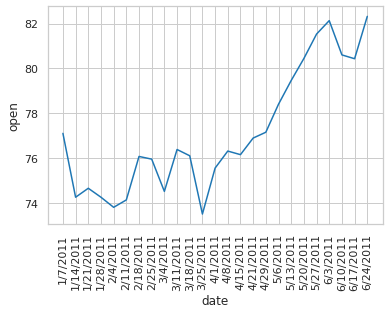

In [ ]:
'''ESSE GRÁFICO É SOBRE O DATAFRAME DF_MCD QUE É SOBRE AS AÇÕES DO 
   MC DONALDS, QUE CRIAMOS ACIMA COM PANDAS.
'''
sns.set_theme(style="whitegrid",palette="tab10")#posso adicionar as grades ou não

                                        #ABAIXO O PARAMETRO Q DIZ SOBRE 
                                        #QUAL DATAFRAME VAMOS ITERAR
plot = sns.lineplot(x="date", y="open", data=df_mcd)
_ = plot.set_xticklabels(labels=df_mcd['date'], rotation=90)

#sns.lineplot para plotar um grafico de linhas -->(eixo_x='DATE' , eixo_y='OPEN', data= data_frame)

Vamos também visualizar os valores de fechamento das ações ao longo do tempo.


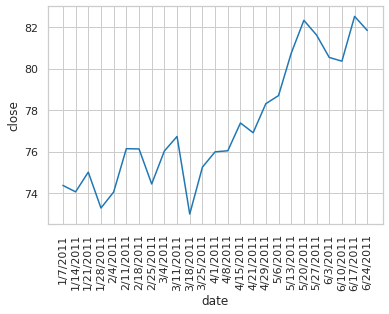

In [ ]:
plot = sns.lineplot(x="date", y="close", data=df_mcd)

_ = plot.set_xticklabels(labels=df_mcd['date'], rotation=90)# >>>>>>>> rotacionado as datas em 90 graus
#UNICA DIFERENÇA DESSE PARA O DE CIMA É QUE NESSE USAMOS O PARAMETRO 
#CLOSE NO EIXO Y.

Para facilitar a comparação, vamo visualizar os quatro valores no mesmo gráfico.


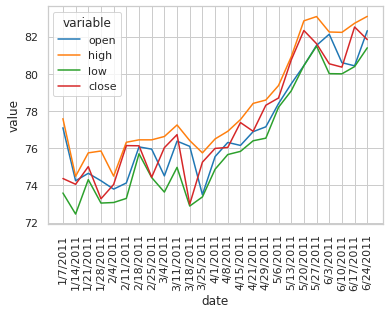

In [ ]:
plot = sns.lineplot(x="date", y="value", hue='variable', data=pd.melt(df_mcd, ['date']))
_ = plot.set_xticklabels(labels=df_mcd['date'], rotation=90)

#HUE diferencia os tipos de elementos 

Para finalizar, vamos salvar o gráfico numa figura.


In [ ]:
plot.figure.savefig("./mcd.png")


**Agora é a sua vez,** faça o gráfico acima para a empresa Coca-Cola e salve a imagem com o nome `ko.png`.


In [ ]:
# visualização dos dados da Coca-Cola.
df_ko.head(n=100)

,date,open,high,low,close
204,1/7/2011,65.88,65.88,62.56,62.92
205,1/14/2011,62.70,63.86,62.56,63.13
206,1/21/2011,63.21,63.92,62.72,62.77
207,1/28/2011,62.87,63.31,62.14,62.21
208,2/4/2011,62.32,63.48,61.89,62.56
209,2/11/2011,62.67,64.75,62.32,63.57
210,2/18/2011,63.67,64.72,62.55,64.55
211,2/25/2011,63.36,64.40,63.33,64.31
212,3/4/2011,64.17,65.87,63.86,65.21
213,3/11/2011,65.32,65.84,64.47,64.81


Vamos visualizar os valores de abertura das ações ao longo do tempo.


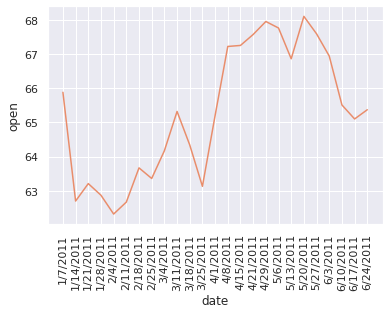

In [ ]:

sns.set_theme(style="darkgrid",palette="flare")

plot = sns.lineplot(x='date', y='open', data=df_ko)
_ = plot.set_xticklabels(labels=df_mcd['date'], rotation=90)

#sns.lineplot para plotar um grafico de linhas -->(eixo_x='DATE' , eixo_y='OPEN', data= data_frame)

Vamos também visualizar os valores de fechamento das ações ao longo do tempo.


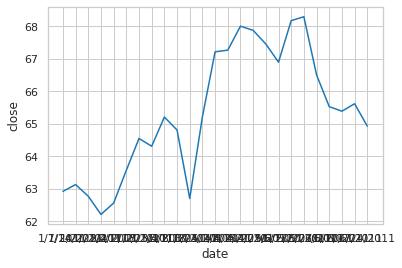

In [ ]:
sns.set_theme(style="whitegrid",palette="tab10")
sns.lineplot(x='date',y='close',data=df_ko)
_ = plot.set_xticklabels(labels=df_mcd['date'], rotation=90)

Para facilitar a comparação, vamo visualizar os quatro valores no mesmo gráfico.


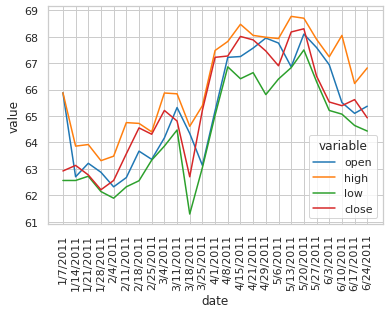

In [ ]:
plot = sns.lineplot(x="date", y="value", hue='variable', data=pd.melt(df_ko, ['date']))
_ = plot.set_xticklabels(labels=df_ko['date'], rotation=90)

Para finalizar, vamos salvar o gráfico numa figura.


In [ ]:
plot.figure.savefig("./ko.png")


Analise as duas imagens e escreva pelo menos um *insight* que você consegue extrair dos dados. Fique a vontade para escrever quantos *insights* você quiser.


Obs: *Insights* são observações sobre o que você percebe/entende/interpreta em suas análises. No caso deste exercício, você vai analisar os dados dos gráficos da empresa McDonalds e da empresa Cola-Cola e notar o que os dados gerados podem ser interessante, que tipo de interpretação o comportamento dos dados estão te trazendo.

##  INSIGHT


---
É notável o melhor desempenho do MC Donalds em relação a Coca Cola.
Pelo menos nesses intervalo de tempo, MCD manteu-se em uma tendência de alta
enquanto a KO por volta de maio, mostrou uma reação negativa perante os Highs and lowers, que começara a ser high mais baixos que os anteriores e Lowers mais 
fundas q as anteriores, mostrando que num curto prazo, a ação encontra-se em uma
sútil tendência de baixa, que na análise técnica chamamos de correção. Mas nada impede que algo fundamentalista tenha acontecido com a empresa e graficamente ela esteja em uma queda.

---



_*Fica nítido comparando os dois gráficos à seguir*_

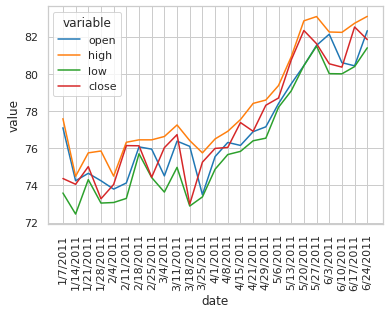

In [ ]:
plot = sns.lineplot(x="date", y="value", hue='variable', data=pd.melt(df_mcd, ['date']))
_ = plot.set_xticklabels(labels=df_mcd['date'], rotation=90)

#MC DONALDS

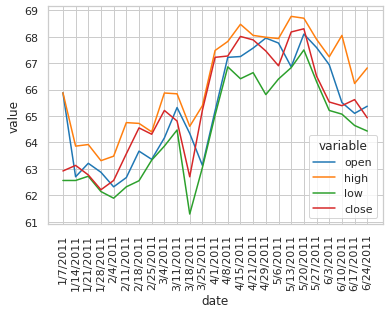

In [ ]:
plot = sns.lineplot(x="date", y="value", hue='variable', data=pd.melt(df_ko, ['date']))
_ = plot.set_xticklabels(labels=df_ko['date'], rotation=90)
#COCA COLA